In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palettable.colorbrewer.diverging import RdBu_11
from palettable.colorbrewer.sequential import *

# Get data sets

In [2]:
# Open data sets as old (smaller domain) and new (larger domain)
ds_new = xr.open_dataset("../output/grids/a3d_grids.nc")
ds_old = xr.open_dataset("../../a3d_grids.nc")

# Clip to common time
n_time = len(ds_new['time'])
ds_old =  ds_old.isel(time=slice(0, n_time))

# Clip to common space
ds_new = ds_new.isel(easting=slice(5, -5))
ds_new = ds_new.isel(northing=slice(5, -5))

ds_new

<xarray.Dataset>
Dimensions:                (easting: 56, northing: 36, time: 8783)
Coordinates:
  * time                   (time) datetime64[ns] 1980-01-01T01:00:00 ... 1980-12-31T23:00:00
  * northing               (northing) float32 -110000.0 -107000.0 ... -5000.0
  * easting                (easting) float32 -1542000.0 ... -1377000.0
Data variables:
    dw                     (time, northing, easting) float32 ...
    ERODEDMASS             (time, northing, easting) float32 ...
    ET                     (time, northing, easting) float32 ...
    snd                    (time, northing, easting) float32 ...
    rlds                   (time, northing, easting) float32 ...
    rsds                   (time, northing, easting) float32 ...
    MS_HNW                 (time, northing, easting) float32 ...
    MS_SNOWPACK_RUNOFF     (time, northing, easting) float32 ...
    MS_WIND                (time, northing, easting) float32 ...
    pr                     (time, northing, easting) float32 ...
    hur                    (time, northing, easting) float32 ...
    snow_density           (time, northing, easting) float32 ...
    SFC_SUBL               (time, northing, easting) float32 ...
    SURF_ALB               (time, northing, easting) float32 ...
    swe                    (time, northing, easting) float32 ...
    ta                     (time, northing, easting) float32 ...
    TOP_ALB                (time, northing, easting) float32 ...
    TSG                    (time, northing, easting) float32 ...
    ts                     (time, northing, easting) float32 ...
    ws                     (time, northing, easting) float32 ...
    VW_DRIFT               (time, northing, easting) float32 ...
    WINDEROSIONDEPOSITION  (time, northing, easting) float32 ...
Attributes:
    date_created:              2020-10-29
    creator_name:              erke2265
    source:                    MeteoIO-2.90
    history:                   2020-10-29T15:08:14Z, erke2265@shas0144.rc.int...
    keywords_vocabulary:       AGU Index Terms
    keywords:                  Cryosphere, Mass Balance, Energy Balance, Atmo...
    title:                     Gridded data for various parameters and timesteps
    institution:               colorado.edu
    product_version:           1.0
    Conventions:               CF-1.6,ACDD-1.3
    standard_name_vocabulary:  CF-1.6
    cdm_data_type:             Grid
    geospatial_bounds_crs:     EPSG:3031
    geospatial_bounds:         Polygon ((-1557000.0000000000 -125000.00000000...

# Function to calculate delta SWE

In [3]:
def calc_swe(ds):
    dm = 1000 * (ds['swe'] - ds['swe'].isel(time=0))
    swe_ts = dm.mean(dim='easting').mean(dim='northing')
    swe_map = dm.isel(time=-1)
    return swe_ts, swe_map

# Compare SWE in clipped domain

SWE diff mean:
5.4010086

SWE Min:
-176.45836

SWE Mean:
314.9076

SWE Max:
537.70825



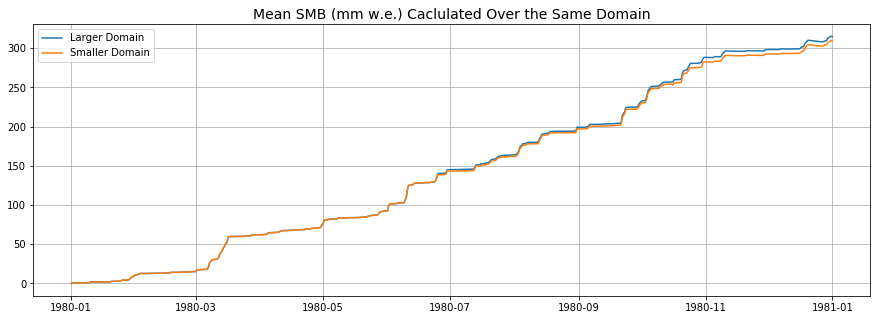

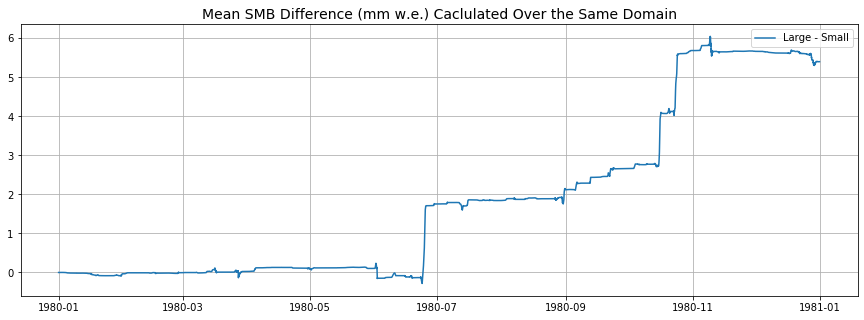

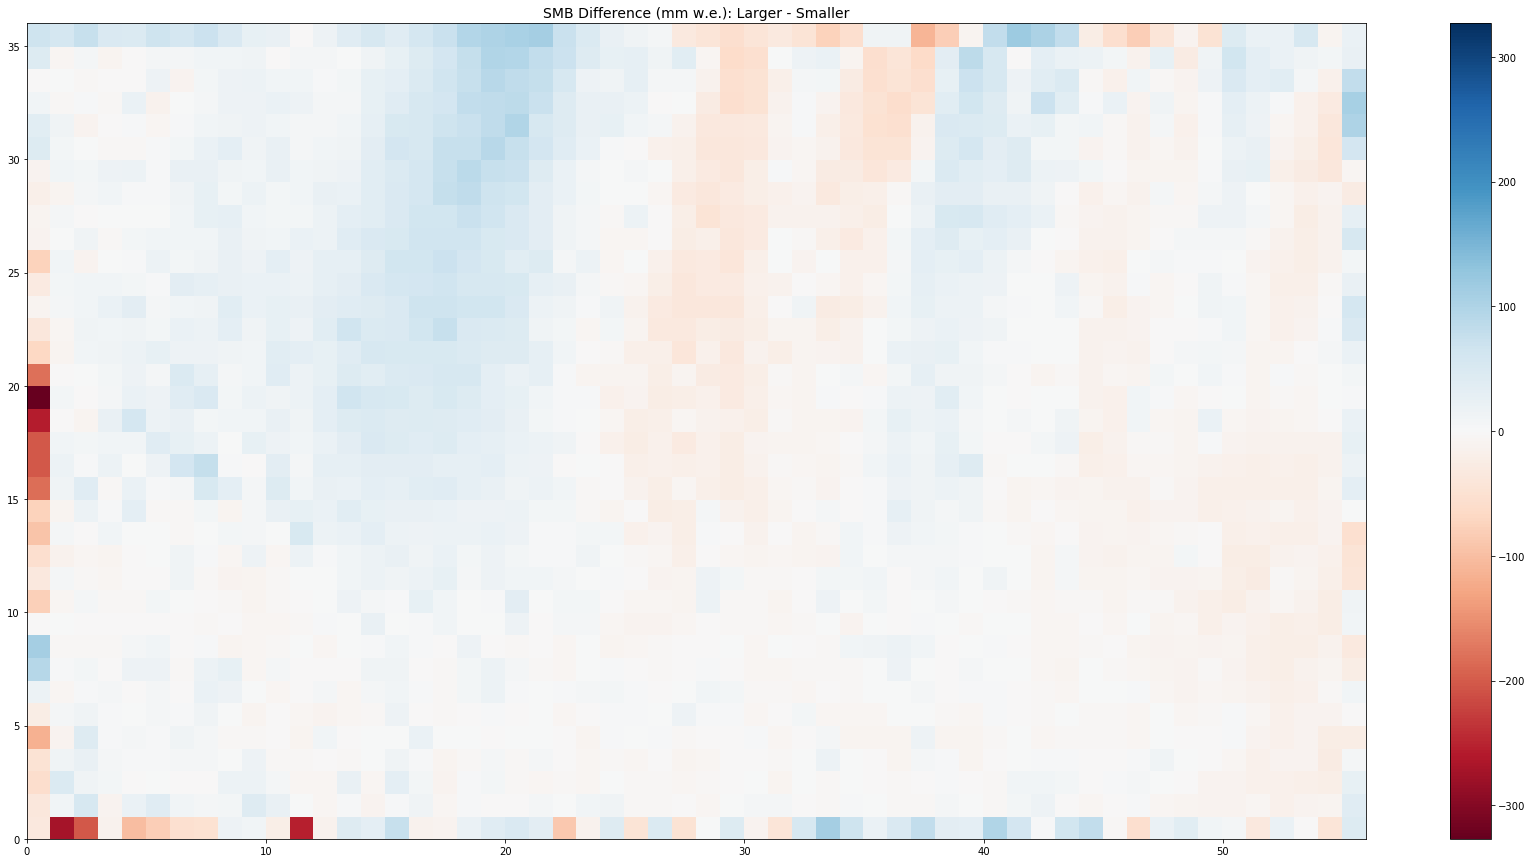

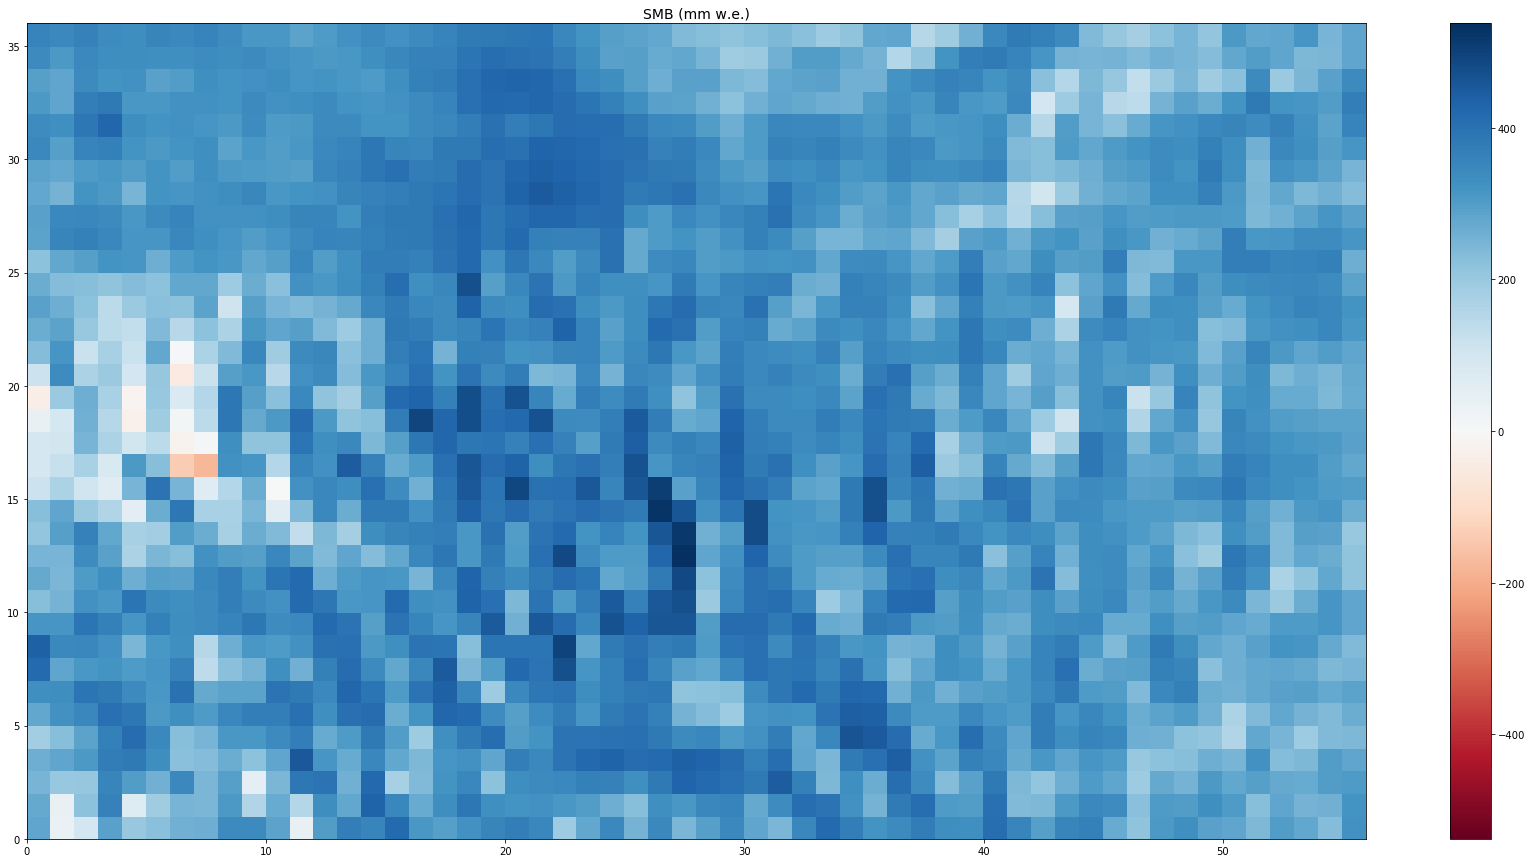

In [4]:
# Delta SWE
swe_new_ts, swe_new_map = calc_swe(ds_new)
swe_old_ts, swe_old_map = calc_swe(ds_old)

# Plot time series
plt.figure(figsize=(15, 5))
plt.plot(ds_new['time'], swe_new_ts, label='Larger Domain')
plt.plot(ds_old['time'], swe_old_ts, label='Smaller Domain')
plt.title("Mean SMB (mm w.e.) Caclulated Over the Same Domain", fontsize=14)
plt.grid()
plt.legend()

# Plot time series difference
plt.figure(figsize=(15, 5))
plt.plot(ds_new['time'], swe_new_ts - swe_old_ts, label='Large - Small')
plt.title("Mean SMB Difference (mm w.e.) Caclulated Over the Same Domain", fontsize=14)
plt.grid()
plt.legend()

# Plot map of diff
diff = swe_new_map - swe_old_map
plt.figure(figsize=(30,15))
plt.pcolor(diff, cmap=RdBu_11.mpl_colormap, vmin=-np.abs(diff).max(), vmax=np.abs(diff).max())
plt.title("SMB Difference (mm w.e.): Larger - Smaller", fontsize=14)
plt.colorbar()

# Plot map of SMB
plt.figure(figsize=(30,15))
plt.pcolor(swe_new_map, cmap=RdBu_11.mpl_colormap, vmin=-np.abs(swe_new_map).max(), vmax=np.abs(swe_new_map).max())
plt.title("SMB (mm w.e.)", fontsize=14)
plt.colorbar()

# Print min SMB
print("SWE diff mean:")
print(diff.mean().values)
print()

print("SWE Min:")
print(swe_new_map.min().values)
print()

print("SWE Mean:")
print(swe_new_map.mean().values)
print()

print("SWE Max:")
print(swe_new_map.max().values)
print()

# Close data set

In [269]:
ds_new.close()
ds_old.close()